In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import openpyxl
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # 결측치 시각화
plt.rc("font", family="Malgun Gothic")

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# 데이터 불러오기 #  encoding = 'CP949'
data = pd.read_csv('/content/drive/MyDrive/ICICPE_질병관리청 데이터/data.csv')

In [ ]:
df = copy.deepcopy(data)

In [ ]:
df

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,2022.08.10.,A801169401,A8011694,2020,1,1,2,A801,1,39,...,3,3,3,8,8,8,8,8,0,1
1,2022.08.10.,A801169402,A8011694,2020,1,1,2,A801,2,39,...,3,3,3,8,8,8,8,8,0,1
2,2022.08.10.,A801169403,A8011694,2020,1,1,2,A801,1,10,...,3,3,3,8,8,8,8,8,0,1
3,2022.08.10.,A801169404,A8011694,2020,1,1,2,A801,1,7,...,3,3,3,8,8,8,8,8,0,1
4,2022.08.10.,A801169405,A8011694,2020,1,1,2,A801,1,4,...,3,3,3,8,8,8,8,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,2022.08.10.,R804366601,R8043666,2020,8,1,2,R804,2,61,...,8,8,8,8,8,8,8,8,0,1
7355,2022.08.10.,R804368301,R8043683,2020,8,1,2,R804,2,51,...,8,8,8,8,8,8,8,8,0,1
7356,2022.08.10.,R804368302,R8043683,2020,8,1,2,R804,2,24,...,8,8,8,8,8,8,8,8,0,1
7357,2022.08.10.,R804371701,R8043717,2020,8,1,2,R804,1,65,...,8,8,8,8,8,8,8,8,0,1


In [ ]:
len(df['ID'].unique())

7359

In [ ]:
df.columns[0:35]

Index(['mod_d', 'ID', 'ID_fam', 'year', 'region', 'town_t', 'apt_t', 'psu',
       'sex', 'age', 'age_month', 'incm', 'ho_incm', 'incm5', 'ho_incm5',
       'edu', 'occp', 'wt_hs', 'wt_itvex', 'wt_oe', 'wt_ntr', 'wt_tot',
       'wt_oent', 'kstrata', 'cfam', 'genertn', 'allownc', 'house', 'live_t',
       'ainc_unit1', 'ainc_1', 'ainc', 'marri_1', 'marri_2', 'fam_rela'],
      dtype='object')

In [ ]:
# 1. 기본변수, 2-1 가구조사, 2-2 이환 변수 정리
#df.drop(columns = ['ID','year','mod_d','ID_fam','town_t', 'apt_t','psu','age_month','ho_incm','ho_incm5','wt_hs', 'wt_itvex', 'wt_oe', 'wt_ntr', 'wt_tot','wt_oent', 'kstrata','genertn','live_t','ainc_unit1', 'ainc_1', 'ainc','fam_rela','tins', 'npins', 'ID_F', 'ID_M','D_2_wk'], inplace =True)

In [ ]:
df.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,2022.08.10.,A801169401,A8011694,2020,1,1,2,A801,1,39,...,3,3,3,8,8,8,8,8,0,1
1,2022.08.10.,A801169402,A8011694,2020,1,1,2,A801,2,39,...,3,3,3,8,8,8,8,8,0,1
2,2022.08.10.,A801169403,A8011694,2020,1,1,2,A801,1,10,...,3,3,3,8,8,8,8,8,0,1
3,2022.08.10.,A801169404,A8011694,2020,1,1,2,A801,1,7,...,3,3,3,8,8,8,8,8,0,1
4,2022.08.10.,A801169405,A8011694,2020,1,1,2,A801,1,4,...,3,3,3,8,8,8,8,8,0,1


In [ ]:
# df.drop(columns = ['year'],inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7359 entries, 0 to 7358
Columns: 762 entries, mod_d to LF_SECUR_G
dtypes: float64(1), int64(19), object(742)
memory usage: 42.8+ MB


In [ ]:
df['DF2_pr'].value_counts() # 우울증 해당 여부 value 개수 확인

8    6294
9     499
      265
1     188
0     113
Name: DF2_pr, dtype: int64

In [ ]:
df['ID'].value_counts().sum()

7359

In [ ]:
'''
# 'ID': 개인 아이디
'region': 17개 시도
'sex': 성별
'age': 나이
'incom': 소득 4분위수(개인)
'edu': 교육수준
'EC1_1': 경제활동 상태
'cfam': 가구원수 9
'allownc': 기초생활수급 여부 99 >>9
'house': 주택소유여부 9
'marri_2': 결혼상태 9
'D_1_1': 주관적 건강인지 9
'D_2_1': 최근 2주간 몸이 불편했던 경험 유무 9
'BD1_11' : (만12세이상)1년간 음주빈도 9
'BE3_75': 고강도 신체활동 여부: 여가
# 'BP5': 2주이상 연속 우울감 여부 9
# 'BP6_10':1년간 자살 생각 여부 9
'mh_stress': 스트레스 인지율
'BS3_1': 현재흡연여부 8 >> 9
'DF2_pr': 우울증 현재 유병 여부  9
'''

"\n# 'ID': 개인 아이디\n'region': 17개 시도\n'sex': 성별\n'age': 나이\n'incom': 소득 4분위수(개인)\n'edu': 교육수준\n'EC1_1': 경제활동 상태\n'cfam': 가구원수 9\n'allownc': 기초생활수급 여부 99 >>9\n'house': 주택소유여부 9\n'marri_2': 결혼상태 9\n'D_1_1': 주관적 건강인지 9\n'D_2_1': 최근 2주간 몸이 불편했던 경험 유무 9\n'BD1_11' : (만12세이상)1년간 음주빈도 9\n'BE3_75': 고강도 신체활동 여부: 여가\n# 'BP5': 2주이상 연속 우울감 여부 9\n# 'BP6_10':1년간 자살 생각 여부 9\n'mh_stress': 스트레스 인지율\n'BS3_1': 현재흡연여부 8 >> 9\n'DF2_pr': 우울증 현재 유병 여부  9\n"

In [ ]:
# 선택한 features로 구성된 df

df = df.loc[:,['region', 'sex', 'age', 'incm', 'edu', 'EC1_1', 'cfam',
       'allownc', 'house', 'marri_2', 'D_1_1', 'D_2_1', 'BD1_11','BE3_75', 'BP5','BP6_10', 'mh_stress', 'BS3_1', 'DF2_pr']]

# df = df.loc[:,['ID', 'region', 'sex', 'age', 'incm', 'incm5', 'edu', 'EC1_1', 'cfam',
#        'allownc', 'house', 'marri_1', 'D_1_1', 'D_2_1', 'BD1_11','BE3_75', 'BP5','BP6_10', 'mh_stress', 'BS3_1', 'DF2_dg']]
df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,BP5,BP6_10,mh_stress,BS3_1,DF2_pr
0,1,1,39,1,4,1,5,20,1,1,2,2,3,2,8,8,0,3,8
1,1,2,39,1,4,1,5,20,1,1,2,2,1,2,8,8,0,8,8
2,1,1,10,1,1,8,5,20,1,88,2,2,8,8,8,8,,8,8
3,1,1,7,1,1,8,5,20,1,88,2,2,8,8,8,8,,8,8
4,1,1,4,1,1,8,5,20,1,88,2,1,8,8,8,8,,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,8,2,61,2,3,1,2,20,2,1,3,2,2,2,8,8,0,8,8
7355,8,2,51,3,4,1,2,10,2,4,3,2,2,1,8,8,0,8,8
7356,8,2,24,3,4,1,2,10,2,88,3,2,6,2,8,8,0,1,8
7357,8,1,65,2,4,2,2,20,2,1,2,2,4,2,8,8,0,3,8


In [ ]:
# 데이터 갯수와 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7359 entries, 0 to 7358
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     7359 non-null   int64 
 1   sex        7359 non-null   int64 
 2   age        7359 non-null   int64 
 3   incm       7359 non-null   object
 4   edu        7359 non-null   object
 5   EC1_1      7359 non-null   object
 6   cfam       7359 non-null   int64 
 7   allownc    7359 non-null   int64 
 8   house      7359 non-null   int64 
 9   marri_2    7359 non-null   int64 
 10  D_1_1      7359 non-null   object
 11  D_2_1      7359 non-null   object
 12  BD1_11     7359 non-null   object
 13  BE3_75     7359 non-null   object
 14  BP5        7359 non-null   object
 15  BP6_10     7359 non-null   object
 16  mh_stress  7359 non-null   object
 17  BS3_1      7359 non-null   object
 18  DF2_pr     7359 non-null   object
dtypes: int64(7), object(12)
memory usage: 1.1+ MB


In [ ]:
# 성인을 대상으로만 함 >>  만 19세 이상
df = df[df['age'] >=19]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6133 entries, 0 to 7358
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     6133 non-null   int64 
 1   sex        6133 non-null   int64 
 2   age        6133 non-null   int64 
 3   incm       6133 non-null   object
 4   edu        6133 non-null   object
 5   EC1_1      6133 non-null   object
 6   cfam       6133 non-null   int64 
 7   allownc    6133 non-null   int64 
 8   house      6133 non-null   int64 
 9   marri_2    6133 non-null   int64 
 10  D_1_1      6133 non-null   object
 11  D_2_1      6133 non-null   object
 12  BD1_11     6133 non-null   object
 13  BE3_75     6133 non-null   object
 14  BP5        6133 non-null   object
 15  BP6_10     6133 non-null   object
 16  mh_stress  6133 non-null   object
 17  BS3_1      6133 non-null   object
 18  DF2_pr     6133 non-null   object
dtypes: int64(7), object(12)
memory usage: 958.3+ KB


In [ ]:
df['DF2_pr'].value_counts()

8    5120
9     499
      213
1     188
0     113
Name: DF2_pr, dtype: int64

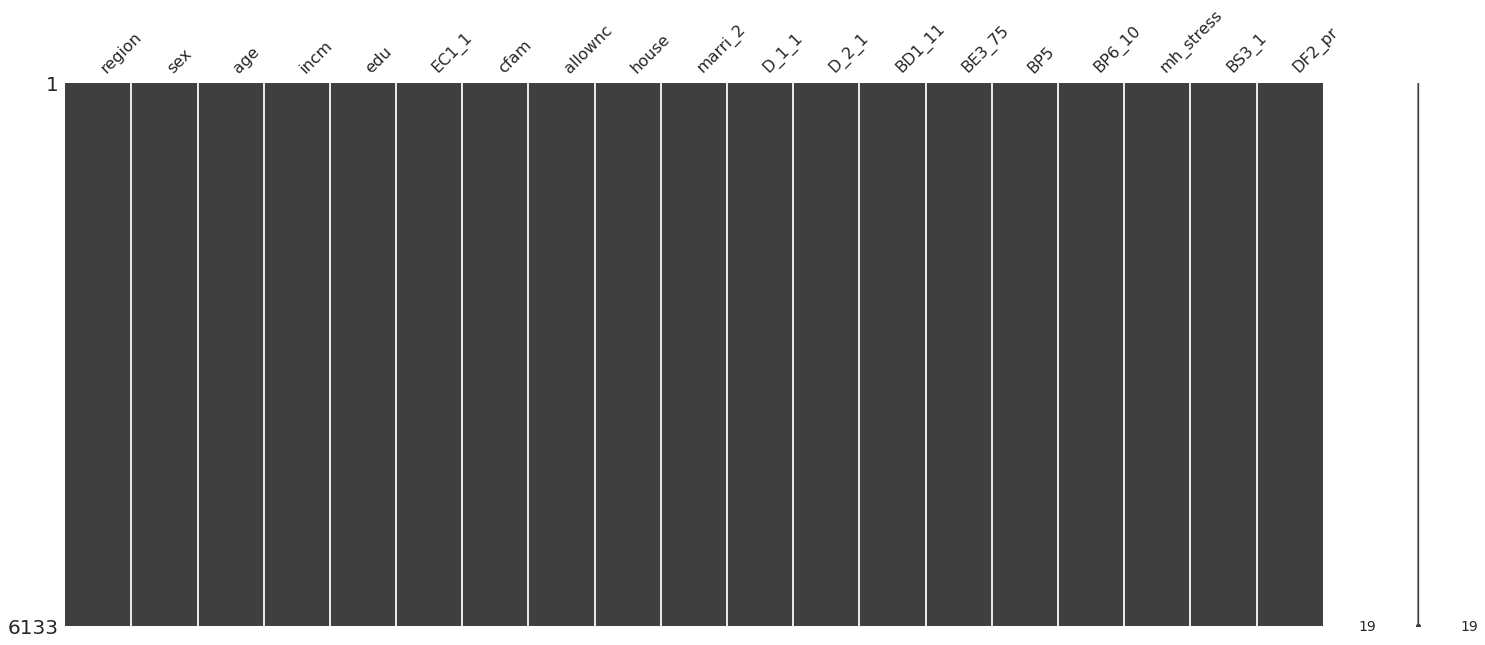

In [ ]:
%matplotlib inline
msno.matrix(df)

# feature 정리

In [ ]:
df.columns

Index(['region', 'sex', 'age', 'incm', 'edu', 'EC1_1', 'cfam', 'allownc',
       'house', 'marri_2', 'D_1_1', 'D_2_1', 'BD1_11', 'BE3_75', 'BP5',
       'BP6_10', 'mh_stress', 'BS3_1', 'DF2_pr'],
      dtype='object')

In [ ]:
df =df.dropna()
df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,BP5,BP6_10,mh_stress,BS3_1,DF2_pr
0,1,1,39,1,4,1,5,20,1,1,2,2,3,2,8,8,0,3,8
1,1,2,39,1,4,1,5,20,1,1,2,2,1,2,8,8,0,8,8
5,1,1,60,4,,9,4,20,2,1,9,9,8,9,8,8,1,1,9
6,1,2,58,4,3,1,4,20,2,1,1,2,2,2,8,8,0,8,8
7,1,1,56,4,4,1,4,20,2,1,1,2,2,1,8,8,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,8,2,61,2,3,1,2,20,2,1,3,2,2,2,8,8,0,8,8
7355,8,2,51,3,4,1,2,10,2,4,3,2,2,1,8,8,0,8,8
7356,8,2,24,3,4,1,2,10,2,88,3,2,6,2,8,8,0,1,8
7357,8,1,65,2,4,2,2,20,2,1,2,2,4,2,8,8,0,3,8


In [ ]:
# .loc[:,['incm', 'incm5', 'edu', 'EC1_1','D_1_1', 'D_2_1', 'BD1_11','BE3_75', 'BP5','BP6_10', 'mh_stress', 'BS3_1', 'DF2_dg']].
df = df.apply(pd.to_numeric, errors = 'coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6133 entries, 0 to 7358
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     6133 non-null   int64  
 1   sex        6133 non-null   int64  
 2   age        6133 non-null   int64  
 3   incm       6103 non-null   float64
 4   edu        5403 non-null   float64
 5   EC1_1      5920 non-null   float64
 6   cfam       6133 non-null   int64  
 7   allownc    6133 non-null   int64  
 8   house      6133 non-null   int64  
 9   marri_2    6133 non-null   int64  
 10  D_1_1      5920 non-null   float64
 11  D_2_1      5920 non-null   float64
 12  BD1_11     5920 non-null   float64
 13  BE3_75     5920 non-null   float64
 14  BP5        5920 non-null   float64
 15  BP6_10     5920 non-null   float64
 16  mh_stress  5854 non-null   float64
 17  BS3_1      5920 non-null   float64
 18  DF2_pr     5920 non-null   float64
dtypes: float64(12), int64(7)
memory usage: 958.3 KB


In [ ]:
df['DF2_pr'].value_counts() # 우울증 해당 여부 value 개수 확인 # 다시 확인

8.0    5120
9.0     499
1.0     188
0.0     113
Name: DF2_pr, dtype: int64

In [ ]:
df['DF2_pr'].unique()

array([ 8.,  9.,  1., nan,  0.])

In [ ]:
# df['DF2_pr'].replace(np.NAN, '9', inplace = True)
# # df['DF2_dg'].replace(9,np.NAN, inplace = True)
# df['DF2_pr'].value_counts()

In [ ]:
# df['incm'].unique()

In [ ]:
# df['incm'].value_counts()

In [ ]:
# df['edu'].unique()

In [ ]:
# 'EC1_1': 경제활동 상태을 모름, 무응답은 결측치로 처리
'''
con1 = df['EC1_1'] == 1
con2 = df['EC1_1'] == 2

df = df.loc[ con1 | con2 , :]
'''
df['EC1_1'].unique()
#df['EC1_1'].replace(9, np.NAN)

array([ 1.,  9.,  2., nan])

In [ ]:
# df['cfam'].unique()

In [ ]:
# # allownc 10 = 있음 = 1, 20 = 없음 = 0, 99 = 모름 9, 무응답 99만 결측치 9로 처리
# df['allownc'].unique()
# df['allownc'].replace(10, 1, inplace = True)
# df['allownc'].replace(20, 0, inplace = True)
# df['allownc'].replace(99, 9, inplace = True)

In [ ]:
# df['allownc'].unique()

In [ ]:
# df['house'].unique()

In [ ]:
# df['D_1_1'].unique()
#, 'D_1_1', 'D_2_1', 'BD1_11', 'BE3_75',
#       'BP5', 'BP6_10', 'mh_stress', 'BS3_1', 'DF2_dg'],

In [ ]:
# df['D_2_1'].unique()

In [ ]:
# df['BD1_11'].unique()

In [ ]:
# df['BE3_75'].unique()

In [ ]:
# 20년: 8 비해당(성인, 소아)를 아니요2로 바꿔줌

# df['BP5'].replace(8, 2, inplace = True)
# df['BP5'].unique()

In [ ]:
# 20년: 8 비해당(성인, 소아)를 아니요2로 바꿔줌
# df['BP6_10'].replace(8, 2, inplace = True)
# df['BP6_10'].unique()

In [ ]:
# df['mh_stress'].unique()

In [ ]:
# 흡연 유무 1,2 >> 1 흡연 // 3, 8 >> 2 무흡연
# df['BS3_1'].replace(2, 1, inplace = True)
# df['BS3_1'].replace(3, 2, inplace = True)
# df['BS3_1'].replace(8, 2, inplace = True)
# df['BS3_1'].unique()

In [ ]:
# df['marri_2'].unique()
# df['marri_2'].replace(99, 9, inplace = True)
# df['marri_2'].replace(88, 10, inplace = True)
# 10은 비혼

In [ ]:
# df['marri_2'].unique()

In [ ]:
# df['incm'] = pd.to_numeric(df['incm'], downcast = 'unsigned', errors = 'coerce')
# df['incm5'] = pd.to_numeric(df['incm5'], downcast = 'signed', errors = 'coerce')
# df['edu'] = pd.to_numeric(df['edu'], downcast = 'signed', errors = 'coerce')

In [ ]:
# df.info()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 0 to 7358
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     5386 non-null   int64  
 1   sex        5386 non-null   int64  
 2   age        5386 non-null   int64  
 3   incm       5386 non-null   float64
 4   edu        5386 non-null   float64
 5   EC1_1      5386 non-null   float64
 6   cfam       5386 non-null   int64  
 7   allownc    5386 non-null   int64  
 8   house      5386 non-null   int64  
 9   marri_2    5386 non-null   int64  
 10  D_1_1      5386 non-null   float64
 11  D_2_1      5386 non-null   float64
 12  BD1_11     5386 non-null   float64
 13  BE3_75     5386 non-null   float64
 14  BP5        5386 non-null   float64
 15  BP6_10     5386 non-null   float64
 16  mh_stress  5386 non-null   float64
 17  BS3_1      5386 non-null   float64
 18  DF2_pr     5386 non-null   float64
dtypes: float64(12), int64(7)
memory usage: 841.6 KB


In [ ]:
# df['BP5'].unique()

In [ ]:
# df['BP6_10'].unique()

In [ ]:
df.drop(['BP5','BP6_10'], axis=1,inplace=True)

# 진짜 dataset 만들기
## incm만 사용
## 8, 9 는 날리기 >> 무응답은 다 날리기
## 음주여부 데이터 넣기
## 결혼 여부에서 상태로 수정
### DF2_pr로 class 수정


In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(df.corr(),annot=True)

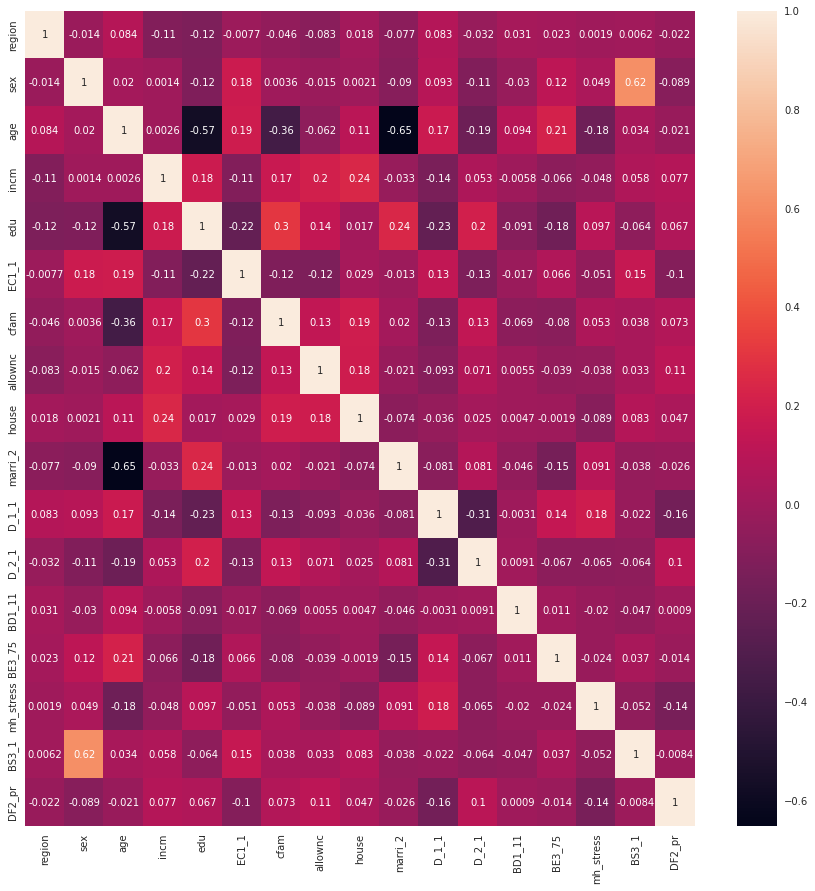

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
# df.columns

In [ ]:
df.columns

Index(['region', 'sex', 'age', 'incm', 'edu', 'EC1_1', 'cfam', 'allownc',
       'house', 'marri_2', 'D_1_1', 'D_2_1', 'BD1_11', 'BE3_75', 'mh_stress',
       'BS3_1', 'DF2_pr'],
      dtype='object')

In [ ]:
df['house'].value_counts()

2    2895
1    1739
3     751
9       1
Name: house, dtype: int64

In [ ]:
df.loc[df['house']==9]=None

In [ ]:
df['house'].value_counts()

2.0    2895
1.0    1739
3.0     751
Name: house, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5386 entries, 0 to 7358
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     5385 non-null   float64
 1   sex        5385 non-null   float64
 2   age        5385 non-null   float64
 3   incm       5385 non-null   float64
 4   edu        5385 non-null   float64
 5   EC1_1      5385 non-null   float64
 6   cfam       5385 non-null   float64
 7   allownc    5385 non-null   float64
 8   house      5385 non-null   float64
 9   marri_2    5385 non-null   float64
 10  D_1_1      5385 non-null   float64
 11  D_2_1      5385 non-null   float64
 12  BD1_11     5385 non-null   float64
 13  BE3_75     5385 non-null   float64
 14  mh_stress  5385 non-null   float64
 15  BS3_1      5385 non-null   float64
 16  DF2_pr     5385 non-null   float64
dtypes: float64(17)
memory usage: 757.4 KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5385 entries, 0 to 7358
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     5385 non-null   float64
 1   sex        5385 non-null   float64
 2   age        5385 non-null   float64
 3   incm       5385 non-null   float64
 4   edu        5385 non-null   float64
 5   EC1_1      5385 non-null   float64
 6   cfam       5385 non-null   float64
 7   allownc    5385 non-null   float64
 8   house      5385 non-null   float64
 9   marri_2    5385 non-null   float64
 10  D_1_1      5385 non-null   float64
 11  D_2_1      5385 non-null   float64
 12  BD1_11     5385 non-null   float64
 13  BE3_75     5385 non-null   float64
 14  mh_stress  5385 non-null   float64
 15  BS3_1      5385 non-null   float64
 16  DF2_pr     5385 non-null   float64
dtypes: float64(17)
memory usage: 757.3 KB


In [ ]:
df['marri_2'].value_counts()

1.0     3510
88.0    1121
3.0      432
4.0      275
2.0       44
99.0       3
Name: marri_2, dtype: int64

In [ ]:
df.loc[df['marri_2']==99.0]=None
df['marri_2'].value_counts()

1.0     3510
88.0    1121
3.0      432
4.0      275
2.0       44
Name: marri_2, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,mh_stress,BS3_1,DF2_pr
0,1.0,1.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,3.0,2.0,0.0,3.0,8.0
1,1.0,2.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,8.0,8.0
6,1.0,2.0,58.0,4.0,3.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,8.0,8.0
7,1.0,1.0,56.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,8.0,8.0
8,1.0,2.0,53.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,3.0,2.0,3.0,2.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,8.0,2.0,61.0,2.0,3.0,1.0,2.0,20.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,8.0,8.0
7355,8.0,2.0,51.0,3.0,4.0,1.0,2.0,10.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,8.0,8.0
7356,8.0,2.0,24.0,3.0,4.0,1.0,2.0,10.0,2.0,88.0,3.0,2.0,6.0,2.0,0.0,1.0,8.0
7357,8.0,1.0,65.0,2.0,4.0,2.0,2.0,20.0,2.0,1.0,2.0,2.0,4.0,2.0,0.0,3.0,8.0


In [ ]:
df.loc[df['EC1_1']==9]=None
df.dropna(inplace=True)

In [ ]:
df.loc[df['cfam']==9]=None
df.dropna(inplace=True)

In [ ]:
df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,mh_stress,BS3_1,DF2_pr
0,1.0,1.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,3.0,2.0,0.0,3.0,8.0
1,1.0,2.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,8.0,8.0
6,1.0,2.0,58.0,4.0,3.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,8.0,8.0
7,1.0,1.0,56.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,8.0,8.0
8,1.0,2.0,53.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,3.0,2.0,3.0,2.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,8.0,2.0,61.0,2.0,3.0,1.0,2.0,20.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,8.0,8.0
7355,8.0,2.0,51.0,3.0,4.0,1.0,2.0,10.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,8.0,8.0
7356,8.0,2.0,24.0,3.0,4.0,1.0,2.0,10.0,2.0,88.0,3.0,2.0,6.0,2.0,0.0,1.0,8.0
7357,8.0,1.0,65.0,2.0,4.0,2.0,2.0,20.0,2.0,1.0,2.0,2.0,4.0,2.0,0.0,3.0,8.0


In [ ]:
df['allownc'].value_counts()

20.0    5023
10.0     359
Name: allownc, dtype: int64

In [ ]:
# df.loc[df['allownc']==9]=None
# df.dropna(inplace=True)

In [ ]:
# df['allownc'].value_counts()

In [ ]:
# df

In [ ]:
df['D_1_1'].value_counts()

3.0    2786
2.0    1307
4.0     862
1.0     249
5.0     178
Name: D_1_1, dtype: int64

In [ ]:
# df.loc[df['D_1_1']==9]=None
# df.dropna(inplace=True)

In [ ]:
# df['D_1_1'].value_counts()

In [ ]:
df['D_2_1'].value_counts()

2.0    4457
1.0     925
Name: D_2_1, dtype: int64

In [ ]:
# df.loc[df['D_2_1']==9]=None
# df.dropna(inplace=True)

In [ ]:
df['BD1_11'].value_counts()

4.0    1136
1.0    1015
2.0    1003
5.0     792
8.0     593
3.0     544
6.0     299
Name: BD1_11, dtype: int64

In [ ]:
# df.loc[df['BD1_11']==9]=None
# df.dropna(inplace=True)

In [ ]:
# df.loc[df['BE3_75']==9]=None
# df.dropna(inplace=True)

In [ ]:
# df.loc[df['mh_stress']==9]=None
# df.dropna(inplace=True)

In [ ]:
df.loc[df['BS3_1']==9]=None
df.dropna(inplace=True)

In [ ]:
df['DF2_pr'].value_counts()

8.0    5083
1.0     187
0.0     112
Name: DF2_pr, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5382 entries, 0 to 7358
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     5382 non-null   float64
 1   sex        5382 non-null   float64
 2   age        5382 non-null   float64
 3   incm       5382 non-null   float64
 4   edu        5382 non-null   float64
 5   EC1_1      5382 non-null   float64
 6   cfam       5382 non-null   float64
 7   allownc    5382 non-null   float64
 8   house      5382 non-null   float64
 9   marri_2    5382 non-null   float64
 10  D_1_1      5382 non-null   float64
 11  D_2_1      5382 non-null   float64
 12  BD1_11     5382 non-null   float64
 13  BE3_75     5382 non-null   float64
 14  mh_stress  5382 non-null   float64
 15  BS3_1      5382 non-null   float64
 16  DF2_pr     5382 non-null   float64
dtypes: float64(17)
memory usage: 756.8 KB


In [ ]:
#sns.pairplot(df)

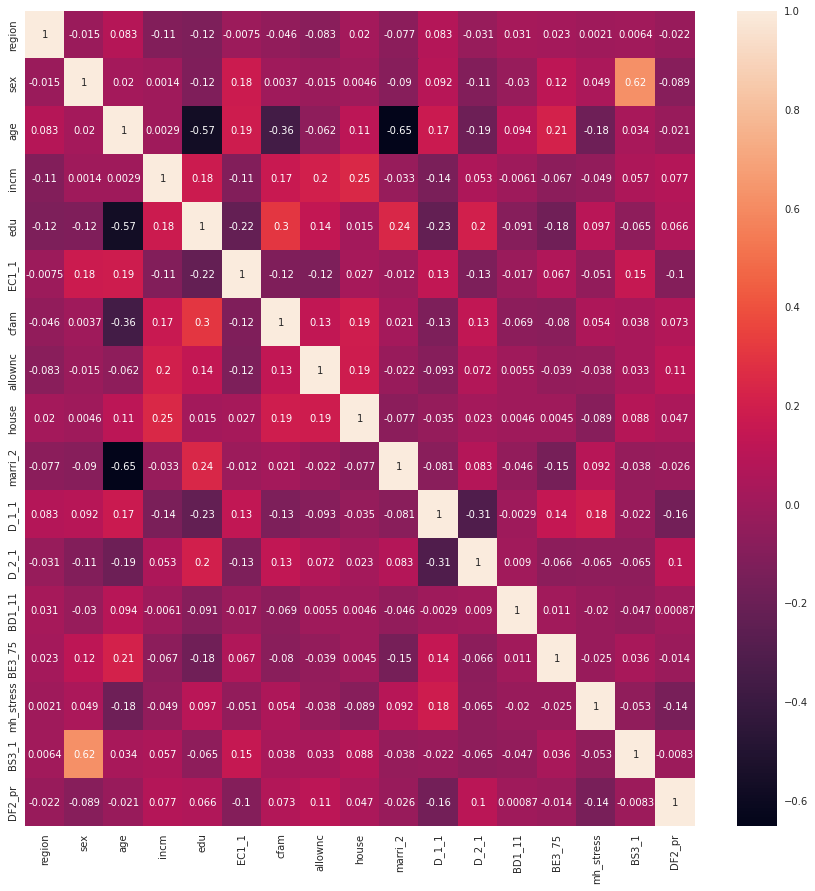

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

# Train-Test Split

In [ ]:
'''
con1 = df['EC1_1'] == 1
con2 = df['EC1_1'] == 2

df = df.loc[ con1 | con2 , :]
'''

"\ncon1 = df['EC1_1'] == 1\ncon2 = df['EC1_1'] == 2\n\ndf = df.loc[ con1 | con2 , :]\n"

In [ ]:
# 라벨링된 데이터 셋
con1 = df['DF2_pr']== 1.
con2 = df['DF2_pr']== 0.
labeled_df = df.loc[con1 | con2 , :]

In [ ]:
labeled_df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,mh_stress,BS3_1,DF2_pr
111,1.0,2.0,53.0,3.0,4.0,1.0,5.0,20.0,2.0,1.0,3.0,1.0,3.0,2.0,1.0,8.0,1.0
123,1.0,2.0,60.0,1.0,4.0,2.0,1.0,10.0,1.0,4.0,4.0,1.0,8.0,2.0,0.0,8.0,1.0
133,1.0,2.0,51.0,3.0,4.0,2.0,2.0,20.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,3.0,0.0
155,1.0,1.0,76.0,2.0,1.0,2.0,2.0,20.0,2.0,1.0,4.0,1.0,6.0,2.0,0.0,3.0,1.0
156,1.0,2.0,70.0,1.0,3.0,2.0,2.0,20.0,2.0,1.0,4.0,2.0,8.0,2.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,17.0,2.0,29.0,1.0,3.0,2.0,1.0,10.0,1.0,2.0,4.0,2.0,6.0,2.0,1.0,1.0,0.0
7269,8.0,2.0,24.0,4.0,4.0,1.0,3.0,20.0,2.0,88.0,3.0,2.0,4.0,2.0,1.0,8.0,0.0
7313,8.0,1.0,44.0,1.0,3.0,1.0,2.0,20.0,1.0,88.0,3.0,2.0,5.0,2.0,1.0,3.0,1.0
7350,8.0,2.0,30.0,2.0,4.0,1.0,1.0,20.0,1.0,88.0,3.0,2.0,3.0,2.0,1.0,8.0,1.0


In [ ]:
# 라벨링되지 않은 데이터 셋
unlabeled_df = df.loc[df['DF2_pr']== 8.]

In [ ]:
unlabeled_df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,mh_stress,BS3_1,DF2_pr
0,1.0,1.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,3.0,2.0,0.0,3.0,8.0
1,1.0,2.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,8.0,8.0
6,1.0,2.0,58.0,4.0,3.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,8.0,8.0
7,1.0,1.0,56.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,8.0,8.0
8,1.0,2.0,53.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,3.0,2.0,3.0,2.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,8.0,2.0,26.0,1.0,4.0,1.0,2.0,20.0,3.0,88.0,3.0,2.0,3.0,2.0,1.0,8.0,8.0
7354,8.0,2.0,61.0,2.0,3.0,1.0,2.0,20.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,8.0,8.0
7355,8.0,2.0,51.0,3.0,4.0,1.0,2.0,10.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,8.0,8.0
7356,8.0,2.0,24.0,3.0,4.0,1.0,2.0,10.0,2.0,88.0,3.0,2.0,6.0,2.0,0.0,1.0,8.0


In [ ]:
from sklearn.model_selection import train_test_split

X=labeled_df.drop("DF2_pr", axis=1)
y=labeled_df["DF2_pr"]
X_train,X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42, stratify=y)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(125, 16)

In [ ]:
y_train.shape

(125,)

In [ ]:
X_test.shape

(120, 16)

In [ ]:
y_test.shape

(120,)

In [ ]:
y_test.unique()

array([1., 0.])

# Modeling

0.5
0.6086956521739131
0.56
0.5833333333333334
[[18 27]
 [33 42]]


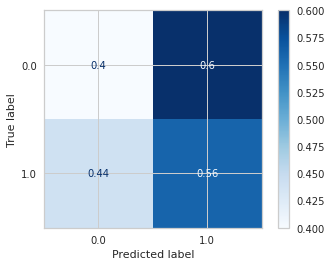

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score, recall_score, confusion_matrix, plot_confusion_matrix
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train,y_train)
pred_DT=DT.predict(X_test)
print(accuracy_score(y_test,pred_DT))
print(precision_score(y_test,pred_DT))
print(recall_score(y_test,pred_DT))
print(f1_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))

plot_confusion_matrix(DT, X_test, y_test, cmap = 'Blues', normalize = 'true')

0.5166666666666667
0.6103896103896104
0.6266666666666667
0.618421052631579
[[15 30]
 [28 47]]


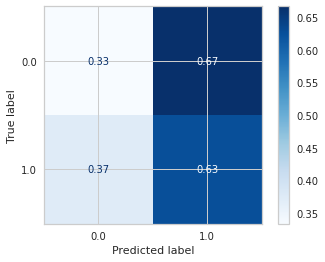

In [ ]:
DT_over = DecisionTreeClassifier(random_state = 42)
DT_over.fit(X_train_over,y_train_over)
pred_DT=DT_over.predict(X_test)
print(accuracy_score(y_test,pred_DT))
print(precision_score(y_test,pred_DT))
print(recall_score(y_test,pred_DT))
print(f1_score(y_test,pred_DT))
print(confusion_matrix(y_test,pred_DT))

plot_confusion_matrix(DT_over, X_test, y_test, cmap = 'Blues', normalize = 'true')

0.5166666666666667
0.5955056179775281
0.7066666666666667
0.6463414634146342
[[ 9 36]
 [22 53]]


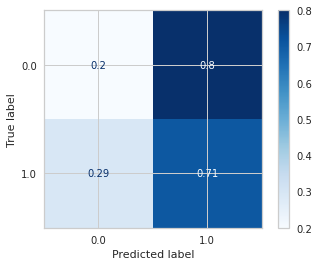

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
RF = RandomForestClassifier(random_state = 42)
RF.fit(X_train,y_train)
pred_FR=RF.predict(X_test)
print(accuracy_score(y_test,pred_FR))
print(precision_score(y_test,pred_FR))
print(recall_score(y_test,pred_FR))
print(f1_score(y_test,pred_FR))
print(confusion_matrix(y_test,pred_FR))

plot_confusion_matrix(RF, X_test, y_test, cmap = 'Blues', normalize = 'true')

0.5416666666666666
0.6190476190476191
0.6933333333333334
0.6540880503144655
[[13 32]
 [23 52]]


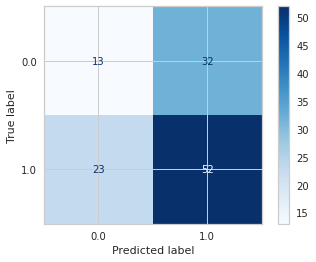

In [ ]:
RF_over = RandomForestClassifier(random_state = 42)
RF_over.fit(X_train_over,y_train_over)
pred_FR=RF_over.predict(X_test)
print(accuracy_score(y_test,pred_FR))
print(precision_score(y_test,pred_FR))
print(recall_score(y_test,pred_FR))
print(f1_score(y_test,pred_FR))
print(confusion_matrix(y_test,pred_FR))

plot_confusion_matrix(RF_over, X_test, y_test, cmap = 'Blues')

0.6083333333333333
0.6555555555555556
0.7866666666666666
0.7151515151515152
[[14 31]
 [16 59]]


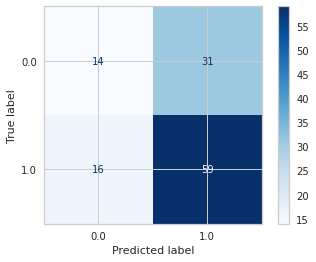

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = "linear", random_state = 42)
clf.fit(X_train,y_train)
#plot_decision_function(X_train, y_train, X_test, y_test, clf)
pred_clf=clf.predict(X_test)
print(accuracy_score(y_test,pred_clf))
print(precision_score(y_test,pred_clf))
print(recall_score(y_test,pred_clf))
print(f1_score(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

plot_confusion_matrix(clf, X_test, y_test, cmap = 'Blues')

0.625
0.7419354838709677
0.6133333333333333
0.6715328467153284
[[29 16]
 [29 46]]


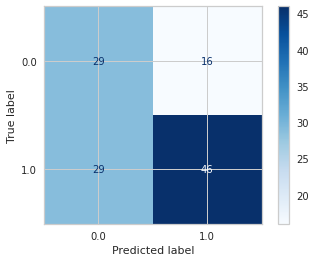

In [ ]:
from sklearn.svm import SVC
clf_over = SVC(kernel = "linear", random_state = 42)
clf_over.fit(X_train_over,y_train_over)
#plot_decision_function(X_train, y_train, X_test, y_test, clf_over)
pred_clf=clf_over.predict(X_test)
print(accuracy_score(y_test,pred_clf))
print(precision_score(y_test,pred_clf))
print(recall_score(y_test,pred_clf))
print(f1_score(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

plot_confusion_matrix(clf_over, X_test, y_test, cmap = 'Blues')

0.6166666666666667
0.6464646464646465
0.8533333333333334
0.735632183908046
[[10 35]
 [11 64]]


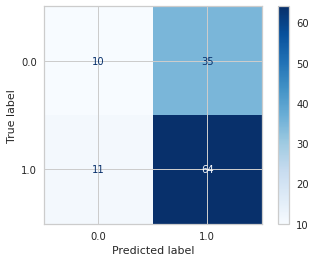

In [ ]:
from sklearn.svm import SVC
clf_rbf = SVC(kernel = "rbf", probability= True, random_state = 42)
clf_rbf.fit(X_train,y_train)
#plot_decision_function(X_train, y_train, X_test, y_test, clf_rbf)
pred_clf=clf_rbf.predict(X_test)
print(accuracy_score(y_test,pred_clf))
print(precision_score(y_test,pred_clf))
print(recall_score(y_test,pred_clf))
print(f1_score(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

plot_confusion_matrix(clf_rbf, X_test, y_test, cmap = 'Blues')

0.6083333333333333
0.6666666666666666
0.7466666666666667
0.7044025157232704
[[17 28]
 [19 56]]


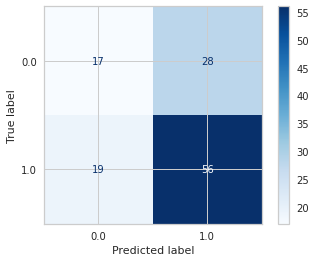

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,pred_lr))
print(precision_score(y_test,pred_lr))
print(recall_score(y_test,pred_lr))
print(f1_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))

plot_confusion_matrix(lr, X_test, y_test, cmap = 'Blues')

0.575
0.6875
0.5866666666666667
0.6330935251798561
[[25 20]
 [31 44]]


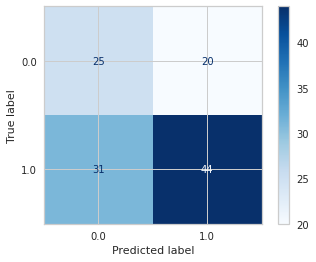

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_over = LogisticRegression(random_state=42)
lr_over.fit(X_train_over,y_train_over)
pred_lr=lr_over.predict(X_test)
print(accuracy_score(y_test,pred_lr))
print(precision_score(y_test,pred_lr))
print(recall_score(y_test,pred_lr))
print(f1_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))

plot_confusion_matrix(lr_over, X_test, y_test, cmap = 'Blues')

0.5166666666666667
0.5955056179775281
0.7066666666666667
0.6463414634146342
[[ 9 36]
 [22 53]]


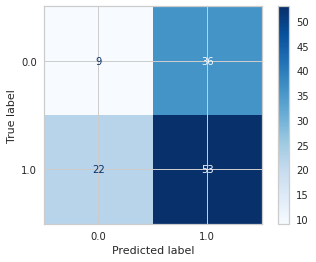

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
pred_ada=ada.predict(X_test)
print(accuracy_score(y_test,pred_ada))
print(precision_score(y_test,pred_ada))
print(recall_score(y_test,pred_ada))
print(f1_score(y_test,pred_ada))
print(confusion_matrix(y_test,pred_ada))

plot_confusion_matrix(ada, X_test, y_test, cmap = 'Blues')

0.5833333333333334
0.654320987654321
0.7066666666666667
0.6794871794871794
[[17 28]
 [22 53]]


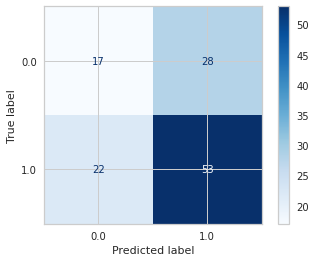

In [ ]:
ada_over = AdaBoostClassifier()
ada_over.fit(X_train_over,y_train_over)
pred_ada=ada_over.predict(X_test)
print(accuracy_score(y_test,pred_ada))
print(precision_score(y_test,pred_ada))
print(recall_score(y_test,pred_ada))
print(f1_score(y_test,pred_ada))
print(confusion_matrix(y_test,pred_ada))
plot_confusion_matrix(ada_over, X_test, y_test, cmap = 'Blues')

In [ ]:
# from xgboost import XGBClassifier as xgb
# parms = {'max_depth' :3,\
#          'eta':0.05,\
#          'objective': 'binary:logistic',\
#          'eval_metric':'recall'\
#          }
# num_rounds = 400
# #eval_list= [(dtr,'train'), (dval, 'eval')] # 학습 데이터셋은 train 또는 평가 데이터 셋은 'eval'로  명기
# #xgb_model = xgb.train(params=parms, dtrain= dtr, num_boost_round= num_rounds, early_stopping = 50, evals = eval_list)
# xgb_model = xgb(n_estimators= 500, learning_rate = 0.1, max_depth = 4)
# xgb_model.fit(X_train,y_train)
# pred_xgb=xgb_model.predict(X_test)
# print(accuracy_score(y_test,pred_xgb))
# print(precision_score(y_test,pred_xgb))
# print(recall_score(y_test,pred_xgb))
# print(f1_score(y_test,pred_xgb))
# print(confusion_matrix(y_test,pred_xgb))

# plot_confusion_matrix(xgb_model, X_test, y_test, cmap = 'Blues')

In [ ]:
# from xgboost import XGBClassifier as xgb
# parms = {'max_depth' :3,\
#          'eta':0.05,\
#          'objective': 'binary:logistic',\
#          'eval_metric':'recall'\
#          }
# num_rounds = 400
# #eval_list= [(dtr,'train'), (dval, 'eval')] # 학습 데이터셋은 train 또는 평가 데이터 셋은 'eval'로  명기
# #xgb_model = xgb.train(params=parms, dtrain= dtr, num_boost_round= num_rounds, early_stopping = 50, evals = eval_list)
# xgb_model = xgb(n_estimators= 500, learning_rate = 0.1, max_depth = 4)
# xgb_model.fit(X_train_over,y_train_over)
# pred_xgb=xgb_model.predict(X_test)
# print(accuracy_score(y_test,pred_xgb))
# print(precision_score(y_test,pred_xgb))
# print(recall_score(y_test,pred_xgb))
# print(f1_score(y_test,pred_xgb))
# print(confusion_matrix(y_test,pred_xgb))

0.6333333333333333
0.6333333333333333
1.0
0.7755102040816326
[[38  0]
 [22  0]]


[1]	valid_0's binary_logloss: 0.652917
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.652977
[3]	valid_0's binary_logloss: 0.64865
[4]	valid_0's binary_logloss: 0.648253
[5]	valid_0's binary_logloss: 0.648121
[6]	valid_0's binary_logloss: 0.648106
[7]	valid_0's binary_logloss: 0.646693
[8]	valid_0's binary_logloss: 0.648512
[9]	valid_0's binary_logloss: 0.648226
[10]	valid_0's binary_logloss: 0.648138
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.646693
0.5833333333333334
0.6190476190476191
0.8666666666666667
0.7222222222222222
[[ 5 40]
 [10 65]]


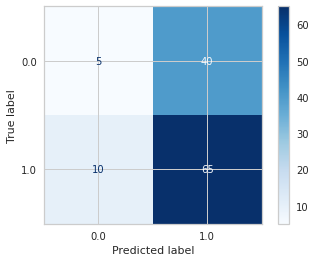

In [ ]:
from lightgbm import LGBMClassifier
lgbm_best = LGBMClassifier(n_estimators= 400, objective='binary', num_iterations = 10, num_leaves =100)
evals = [(X_val, y_val)]
lgbm_best.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm_best.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm))

plot_confusion_matrix(lgbm_best, X_test, y_test, cmap = 'Blues')

In [ ]:
# lgbm = LGBMClassifier(n_estimators= 400, objective='binary', num_iterations = 10, num_leaves =100)
# evals = [(X_val, y_val)]
# lgbm.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='f1 score', eval_set=evals, verbose=True)
# pred_lgbm = lgbm.predict(X_test)
# print(accuracy_score(y_test,pred_lgbm))
# print(precision_score(y_test,pred_lgbm))
# print(recall_score(y_test,pred_lgbm))
# print(f1_score(y_test,pred_lgbm))
# print(confusion_matrix(y_test,pred_lgbm))

# plot_confusion_matrix(lgbm, X_test, y_test, cmap = 'Blues')

[1]	valid_0's binary_logloss: 0.652917
Training until validation scores don't improve for 12 rounds.
[2]	valid_0's binary_logloss: 0.652977
[3]	valid_0's binary_logloss: 0.64865
[4]	valid_0's binary_logloss: 0.648253
[5]	valid_0's binary_logloss: 0.648121
[6]	valid_0's binary_logloss: 0.648106
[7]	valid_0's binary_logloss: 0.646693
[8]	valid_0's binary_logloss: 0.648512
[9]	valid_0's binary_logloss: 0.648226
[10]	valid_0's binary_logloss: 0.648138
[11]	valid_0's binary_logloss: 0.646908
[12]	valid_0's binary_logloss: 0.646502
[13]	valid_0's binary_logloss: 0.64781
[14]	valid_0's binary_logloss: 0.648711
[15]	valid_0's binary_logloss: 0.645203
[16]	valid_0's binary_logloss: 0.64648
[17]	valid_0's binary_logloss: 0.645846
[18]	valid_0's binary_logloss: 0.645809
[19]	valid_0's binary_logloss: 0.640712
[20]	valid_0's binary_logloss: 0.642206
[21]	valid_0's binary_logloss: 0.639165
[22]	valid_0's binary_logloss: 0.637476
[23]	valid_0's binary_logloss: 0.637471
[24]	valid_0's binary_logloss:

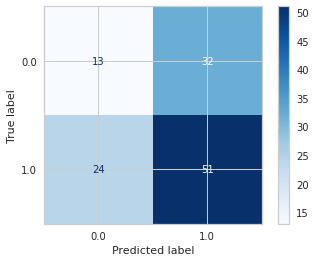

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 400)
evals = [(X_val, y_val)]
lgbm.fit(X_train, y_train, early_stopping_rounds=12, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm))

plot_confusion_matrix(lgbm, X_test, y_test, cmap = 'Blues')

[1]	valid_0's binary_logloss: 0.690474
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.68333
[3]	valid_0's binary_logloss: 0.68113
[4]	valid_0's binary_logloss: 0.670147
[5]	valid_0's binary_logloss: 0.659707
[6]	valid_0's binary_logloss: 0.656764
[7]	valid_0's binary_logloss: 0.653196
[8]	valid_0's binary_logloss: 0.652409
[9]	valid_0's binary_logloss: 0.652548
[10]	valid_0's binary_logloss: 0.652384
Did not meet early stopping. Best iteration is:
[10]	valid_0's binary_logloss: 0.652384
0.5333333333333333
0.6417910447761194
0.5733333333333334
0.6056338028169014
[[21 24]
 [32 43]]


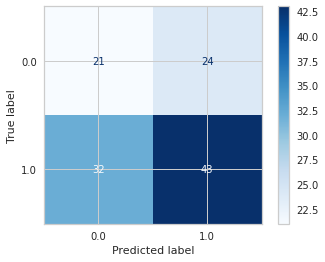

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators= 400, objective='binary', num_iterations = 10, num_leaves =100)
evals = [(X_val, y_val)]
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm))

plot_confusion_matrix(lgbm, X_test, y_test, cmap = 'Blues')

#Semi-Supervised learning


In [ ]:
# 라벨링되지 않은 데이터 셋
unlabeled_df = df.loc[df['DF2_pr']== 8.]

In [ ]:
unlabeled_df

,region,sex,age,incm,edu,EC1_1,cfam,allownc,house,marri_2,D_1_1,D_2_1,BD1_11,BE3_75,mh_stress,BS3_1,DF2_pr
0,1.0,1.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,3.0,2.0,0.0,3.0,8.0
1,1.0,2.0,39.0,1.0,4.0,1.0,5.0,20.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,8.0,8.0
6,1.0,2.0,58.0,4.0,3.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,2.0,0.0,8.0,8.0
7,1.0,1.0,56.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,8.0,8.0
8,1.0,2.0,53.0,4.0,4.0,1.0,4.0,20.0,2.0,1.0,3.0,2.0,3.0,2.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,8.0,2.0,26.0,1.0,4.0,1.0,2.0,20.0,3.0,88.0,3.0,2.0,3.0,2.0,1.0,8.0,8.0
7354,8.0,2.0,61.0,2.0,3.0,1.0,2.0,20.0,2.0,1.0,3.0,2.0,2.0,2.0,0.0,8.0,8.0
7355,8.0,2.0,51.0,3.0,4.0,1.0,2.0,10.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,8.0,8.0
7356,8.0,2.0,24.0,3.0,4.0,1.0,2.0,10.0,2.0,88.0,3.0,2.0,6.0,2.0,0.0,1.0,8.0


In [ ]:
X_unlabeled = unlabeled_df.drop('DF2_pr', axis = 1)

In [ ]:
X_unlabeled = Scaler.transform(X_unlabeled)

In [ ]:
X_unlabeled = pd.DataFrame(X_unlabeled)

In [ ]:
lgbm_best.predict_proba(X_test)

array([[0.32864025, 0.67135975],
       [0.41805057, 0.58194943],
       [0.2498524 , 0.7501476 ],
       [0.2498524 , 0.7501476 ],
       [0.34974183, 0.65025817],
       [0.2498524 , 0.7501476 ],
       [0.38873245, 0.61126755],
       [0.38223116, 0.61776884],
       [0.54435467, 0.45564533],
       [0.31995209, 0.68004791],
       [0.37540086, 0.62459914],
       [0.48278109, 0.51721891],
       [0.3155315 , 0.6844685 ],
       [0.41853118, 0.58146882],
       [0.43927958, 0.56072042],
       [0.45744709, 0.54255291],
       [0.33053351, 0.66946649],
       [0.51350891, 0.48649109],
       [0.35701345, 0.64298655],
       [0.2444516 , 0.7555484 ],
       [0.37002746, 0.62997254],
       [0.5226796 , 0.4773204 ],
       [0.35557253, 0.64442747],
       [0.42691188, 0.57308812],
       [0.42632212, 0.57367788],
       [0.39979275, 0.60020725],
       [0.47580284, 0.52419716],
       [0.35885945, 0.64114055],
       [0.31995209, 0.68004791],
       [0.54435467, 0.45564533],
       [0.

In [ ]:
pd.DataFrame(lgbm.predict_proba(X_unlabeled)).describe()

,0,1
count,5083.000000,5083.000000
mean,0.594128,0.405872
std,0.121822,0.121822
min,0.244714,0.233574
25%,0.498193,0.294240
50%,0.595083,0.404917
75%,0.705760,0.501807
max,0.766426,0.755286


In [ ]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.500,1.0,0.066667,0.000000,0.666667,1.0,0.6,1.0,0.0,1.000000,0.50,1.0,0.000000,1.0,1.0,1.0
1,0.250,1.0,0.716667,0.666667,0.000000,0.0,0.2,1.0,1.0,0.000000,0.75,0.0,1.000000,1.0,0.0,1.0
2,0.000,1.0,0.516667,1.000000,1.000000,0.0,0.2,1.0,0.5,0.000000,0.50,1.0,0.285714,1.0,1.0,1.0
3,0.000,1.0,0.766667,0.000000,0.000000,0.0,0.0,1.0,0.0,0.011494,0.50,1.0,1.000000,1.0,0.0,1.0
4,0.875,1.0,0.816667,0.000000,0.000000,1.0,0.2,1.0,0.5,0.000000,0.50,1.0,1.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.500,1.0,0.450000,0.000000,1.000000,1.0,0.8,1.0,0.0,0.000000,0.50,1.0,0.142857,1.0,0.0,1.0
121,0.500,1.0,0.033333,0.666667,0.666667,1.0,0.4,1.0,0.5,1.000000,0.75,1.0,0.285714,0.0,1.0,0.0
122,0.500,1.0,0.566667,0.000000,0.666667,0.0,0.2,1.0,0.5,0.000000,0.50,1.0,0.285714,1.0,1.0,1.0
123,0.875,1.0,0.833333,0.666667,0.666667,1.0,0.2,1.0,1.0,0.000000,0.75,1.0,0.000000,1.0,0.0,1.0


In [ ]:
X_train_over = pd.DataFrame(X_train_over)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.500,1.0,0.066667,0.000000,0.666667,1.0,0.6,1.0,0.0,1.000000,0.50,1.0,0.000000,1.0,1.0,1.0
1,0.250,1.0,0.716667,0.666667,0.000000,0.0,0.2,1.0,1.0,0.000000,0.75,0.0,1.000000,1.0,0.0,1.0
2,0.000,1.0,0.516667,1.000000,1.000000,0.0,0.2,1.0,0.5,0.000000,0.50,1.0,0.285714,1.0,1.0,1.0
3,0.000,1.0,0.766667,0.000000,0.000000,0.0,0.0,1.0,0.0,0.011494,0.50,1.0,1.000000,1.0,0.0,1.0
4,0.875,1.0,0.816667,0.000000,0.000000,1.0,0.2,1.0,0.5,0.000000,0.50,1.0,1.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.500,1.0,0.450000,0.000000,1.000000,1.0,0.8,1.0,0.0,0.000000,0.50,1.0,0.142857,1.0,0.0,1.0
121,0.500,1.0,0.033333,0.666667,0.666667,1.0,0.4,1.0,0.5,1.000000,0.75,1.0,0.285714,0.0,1.0,0.0
122,0.500,1.0,0.566667,0.000000,0.666667,0.0,0.2,1.0,0.5,0.000000,0.50,1.0,0.285714,1.0,1.0,1.0
123,0.875,1.0,0.833333,0.666667,0.666667,1.0,0.2,1.0,1.0,0.000000,0.75,1.0,0.000000,1.0,0.0,1.0


# 내 이론 semi

In [ ]:
'''
from lightgbm import LGBMClassifier
lgbm_best = LGBMClassifier(n_estimators= 400, objective='binary', num_iterations = 10, num_leaves =100)
evals = [(X_val, y_val)]
lgbm_best.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm_best.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm))

plot_confusion_matrix(lgbm_best, X_test, y_test, cmap = 'Blues')
'''

"\nfrom lightgbm import LGBMClassifier\nlgbm_best = LGBMClassifier(n_estimators= 400, objective='binary', num_iterations = 10, num_leaves =100)\nevals = [(X_val, y_val)]\nlgbm_best.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)\npred_lgbm = lgbm_best.predict(X_test)\nprint(accuracy_score(y_test,pred_lgbm))\nprint(precision_score(y_test,pred_lgbm))\nprint(recall_score(y_test,pred_lgbm))\nprint(f1_score(y_test,pred_lgbm))\nprint(confusion_matrix(y_test,pred_lgbm))\n\nplot_confusion_matrix(lgbm_best, X_test, y_test, cmap = 'Blues')\n"

In [ ]:

# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
test_accs = [] # accuracy
test_precis = []
test_Recalls = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1]

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:

    # Fit classifier and make train/test predictions
    lgbm_best = LGBMClassifier(n_estimators= 400, objective='binary', num_iterations = 10, num_leaves =100)
    evals = [(X_val, y_val)]
    lgbm_best.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='recall', eval_set=evals, verbose=True)
    pred_lgbm = lgbm_best.predict(X_test)

    #clf = LogisticRegression(max_iter=1000)
    #clf.fit(X_train, y_train)
    #y_hat_train = clf.predict(X_train)
    #y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    #train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, pred_lgbm)
    #print(type(test_f1))
    test_acc =accuracy_score(y_test, pred_lgbm)
    test_preci= precision_score(y_test, pred_lgbm)
    #test_preci= test_preci.item()
    test_Recall = recall_score(y_test, pred_lgbm)
    #test_Recall=test_Recall.item()
    #test_acc =test_acc.item()
    #print(type(test_f1))
    print(f"Iteration {iterations}")
    #print(f"Train f1: {train_f1}")
    print(f"Test f1: {test_f1}")
    #train_f1s.append(train_f1)
    test_f1s.append(test_f1)
    print(f"Test acc: {test_acc}")
    test_accs.append(test_acc)
    print(f"test preci: {test_preci}")
    test_precis.append(test_preci)
    print(f"test Recall: {test_Recall}")
    test_Recalls.append(test_Recall)


    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")
    pred_probs = lgbm_best.predict_proba(X_unlabeled)
    preds = lgbm_best.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob.index = X_unlabeled.index

    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.75],
                           df_pred_prob.loc[df_pred_prob['prob_1'] > 0.75]], # + (iterations/1000)
                          axis=0)
    print(iterations)
    print(f"{len(high_prob)} high-probability predictions added to training data.")

    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])

    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

    iterations += 1

    if len(X_unlabeled) == 0:
      break
    else:
      continue
    # Update iteration counter
    #iterations += 1

[1]	valid_0's binary_logloss: 0.652917
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.652977
[3]	valid_0's binary_logloss: 0.64865
[4]	valid_0's binary_logloss: 0.648253
[5]	valid_0's binary_logloss: 0.648121
[6]	valid_0's binary_logloss: 0.648106
[7]	valid_0's binary_logloss: 0.646693
[8]	valid_0's binary_logloss: 0.648512
[9]	valid_0's binary_logloss: 0.648226
[10]	valid_0's binary_logloss: 0.648138
Did not meet early stopping. Best iteration is:
[7]	valid_0's binary_logloss: 0.646693
Iteration 0
Test f1: 0.7222222222222222
Test acc: 0.5833333333333334
test preci: 0.6190476190476191
test Recall: 0.8666666666666667
Now predicting labels for unlabeled data...
0
154 high-probability predictions added to training data.
4929 unlabeled instances remaining.

[1]	valid_0's binary_logloss: 0.754429
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's binary_logloss: 0.739842
[3]	valid_0's binary_logloss: 0.729864
[4]	valid_

In [ ]:
lgbm_best.predict_proba(X_test)

array([[0.09636402, 0.90363598],
       [0.01255533, 0.98744467],
       [0.03608942, 0.96391058],
       [0.04693451, 0.95306549],
       [0.04360987, 0.95639013],
       [0.02970497, 0.97029503],
       [0.01983337, 0.98016663],
       [0.01873904, 0.98126096],
       [0.01696395, 0.98303605],
       [0.01259225, 0.98740775],
       [0.01260182, 0.98739818],
       [0.11824111, 0.88175889],
       [0.07543842, 0.92456158],
       [0.01258151, 0.98741849],
       [0.01255533, 0.98744467],
       [0.02849074, 0.97150926],
       [0.05521185, 0.94478815],
       [0.01259189, 0.98740811],
       [0.012599  , 0.987401  ],
       [0.01260271, 0.98739729],
       [0.01558389, 0.98441611],
       [0.04269115, 0.95730885],
       [0.01260302, 0.98739698],
       [0.01948241, 0.98051759],
       [0.01259799, 0.98740201],
       [0.07075929, 0.92924071],
       [0.03873818, 0.96126182],
       [0.02028585, 0.97971415],
       [0.0353096 , 0.9646904 ],
       [0.01258151, 0.98741849],
       [0.

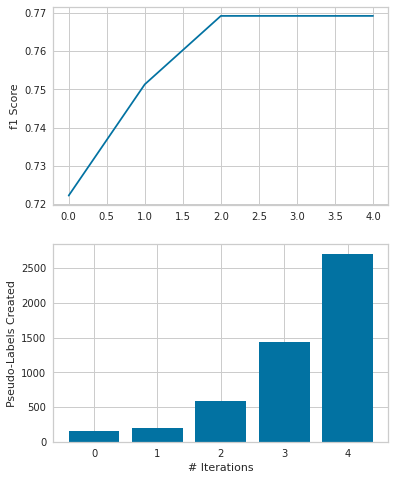

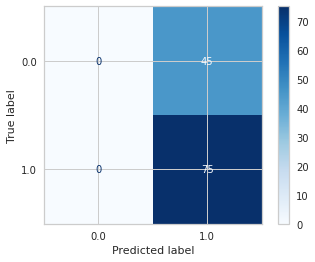

In [ ]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax1.plot(range(iterations), test_f1s)
ax1.set_ylabel('f1 Score')
ax2.bar(x=range(iterations), height=pseudo_labels)
ax2.set_ylabel('Pseudo-Labels Created')
ax2.set_xlabel('# Iterations');
#ax3.plot(range(iterations), test_accs)
#ax1.set_ylabel('accuracy')

# View confusion matrix after self-training

plot_confusion_matrix(lgbm_best, X_test, y_test, cmap='Blues');

In [ ]:
type(test_f1s)

list

In [ ]:
iterations

5

In [ ]:
Range = list(range(iterations))
Range

[0, 1, 2, 3, 4]

In [ ]:
test_f1s

[0.7222222222222222,
 0.7513227513227514,
 0.7692307692307693,
 0.7692307692307693,
 0.7692307692307693]

TypeError: ignored

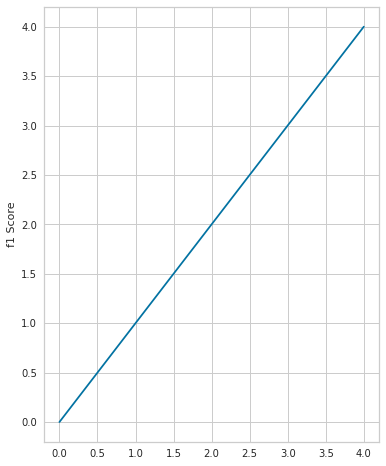

In [ ]:
# Plot f1 scores and number of pseudo-labels added for all iterations

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,8))
ax1.plot([0, 1, 2, 3, 4])
ax1.set_ylabel('f1 Score')
ax1.set_xticks([0,1,2,3,4])
#ax2.bar(x=range(iterations), height=pseudo_labels)
#ax2.set_ylabel('Pseudo-Labels Created')
#ax2.set_xlabel('Iterations');
#plt.grid(False)

#ax3.plot(range(iterations), test_accs)
#ax3.set_ylabel('accuracy')

# View confusion matrix after self-training

# plot_confusion_matrix(lgbm_best, X_test, y_test, cmap='Blues');

In [ ]:
iterations

In [ ]:
from yellowbrick.classifier import ROCAUC

lgbm_best = ROCAUC(lgbm_best)
lgbm_best.fit(X_train, y_train)
lgbm_best.score(X_test, y_test)
lgbm_best.show()

In [ ]:
pred_probs.ndim

In [ ]:
X_unlabeled.shape

In [ ]:
X_unlabeled.ndim

In [ ]:
type(X_unlabeled)

In [ ]:
# X_test.type

# 이전 semi

In [ ]:
'''
lgbm = LGBMClassifier(n_estimators= 400)

evals = [(X_val, y_val)]
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)

preds = lgbm.predict(X_unlabeled)
preds = pd.DataFrame(preds)

X_train_over = pd.concat([X_train_over, X_unlabeled], axis=0)
y_train_over = pd.concat([y_train_over, preds])

index = np.arange(0, len(X_train_over))
index = np.random.shuffle(index)

X_train_over = X_train_over.values
y_train_over = y_train_over.values

X_train_over = X_train_over[index].reshape(-1, 16)
y_train_over = y_train_over[index].reshape(-1, 1)

X_train_over = pd.DataFrame(X_train_over)
y_train_over = pd.DataFrame(y_train_over)

lgbm = LGBMClassifier(n_estimators= 400)

evals = [(X_val, y_val)]
lgbm.fit(X_train_over, y_train_over, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))
'''

In [ ]:
# X_train_over.shape

In [ ]:
# y_train_over.shape

In [ ]:
lgbm = LGBMClassifier(n_estimators= 400)

evals = [(X_val, y_val)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)

preds = lgbm.predict(X_unlabeled)
preds = pd.DataFrame(preds)

X_train = pd.concat([X_train, X_unlabeled], axis=0)
y_train = pd.concat([y_train, preds])

index = np.arange(0, len(X_train))
index = np.random.shuffle(index)

X_train = X_train.values
y_train = y_train.values

X_train = X_train[index].reshape(-1, 16)
y_train = y_train[index].reshape(-1, 1)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

lgbm = LGBMClassifier(n_estimators= 400)

evals = [(X_val, y_val)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=True)
pred_lgbm = lgbm.predict(X_test)
print(accuracy_score(y_test,pred_lgbm))
print(precision_score(y_test,pred_lgbm))
print(recall_score(y_test,pred_lgbm))
print(f1_score(y_test,pred_lgbm))
print(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(feature, target,test_size=0.4, random_state=42, stratify=target)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
# 라벨링되지 않은 데이터 셋
unlabeled_df = df.loc[df['DF2_pr']== 8.]

In [ ]:
X_unlabeled = unlabeled_df.drop('DF2_pr', axis = 1)

In [ ]:
y_train = y_train.values

In [ ]:
X_unlabeled = Scaler.transform(X_unlabeled)
X_unlabeled = pd.DataFrame(X_unlabeled)

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
pd.Series(y_train.values.reshape(-1)).unique()

In [ ]:
X_train = Scaler.transform(X_train)
X_val = Scaler.transform(X_val)
X_test = Scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
#train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1]

# Loop will run until there are no more high-probability pseudo-labels
lgbm = LGBMClassifier(n_estimators= 400)
while len(high_prob) > 0:
    # Fit classifier and make train/test predictions

    evals = [(X_val, y_val)]
    lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=False)
    pred_lgbm = lgbm.predict(X_test)


    '''
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
'''
    # Calculate and print iteration # and f1 scores, and store f1 scores
    #train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, pred_lgbm)
    print(f"Iteration {iterations}")

    #train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    # Generate predictions and probabilities for unlabeled data

    if len(X_unlabeled)>0 :
      print(f"Now predicting labels for unlabeled data...")

      print(len(X_unlabeled))
      pred_probs = lgbm.predict_proba(X_unlabeled)
      preds = lgbm.predict(X_unlabeled)
      prob_0 = pred_probs[:,0]
      prob_1 = pred_probs[:,1]

      # Store predictions and probabilities in dataframe
      df_pred_prob = pd.DataFrame([])
      df_pred_prob['preds'] = preds
      df_pred_prob['prob_0'] = prob_0
      df_pred_prob['prob_1'] = prob_1
      df_pred_prob.index = X_unlabeled.index

      # Separate predictions with > 99% probability
      high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.7],
                            df_pred_prob.loc[df_pred_prob['prob_1'] > 0.7]],
                            axis=0)
      print(f"{len(high_prob)} high-probability predictions added to training data.")

      pseudo_labels.append(len(high_prob))

      # Add pseudo-labeled data to training data
      X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
      y_train = pd.concat([y_train, high_prob.preds], axis=0)

      index = np.arange(0, len(X_train))
      index = np.random.shuffle(index)

      X_train = X_train.values
      y_train = y_train.values

      X_train = X_train[index].reshape(-1, 16)
      y_train = y_train[index].reshape(-1, 1)

      X_train = pd.DataFrame(X_train)
      y_train = pd.DataFrame(y_train)


      # Drop pseudo-labeled instances from unlabeled data
      X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    else:
      high_prob = []

    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

    print(accuracy_score(y_test,pred_lgbm))
    print(precision_score(y_test,pred_lgbm))
    print(recall_score(y_test,pred_lgbm))
    print(f1_score(y_test,pred_lgbm))
    print(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))

    # Update iteration counter
    if len(high_prob) == 0 and iterations > 0:
      break

    iterations += 1


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(feature, target,test_size=0.4, random_state=42, stratify=target)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.3, random_state=42, stratify=y_train)

In [ ]:
# 라벨링되지 않은 데이터 셋
unlabeled_df = df.loc[df['DF2_pr']== 8.]

In [ ]:
X_unlabeled = unlabeled_df.drop('DF2_pr', axis = 1)

In [ ]:
y_train = y_train.values

In [ ]:
X_unlabeled = Scaler.transform(X_unlabeled)
X_unlabeled = pd.DataFrame(X_unlabeled)

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
X_train = Scaler.transform(X_train)
X_val = Scaler.transform(X_val)
X_test = Scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
#train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1]

# Loop will run until there are no more high-probability pseudo-labels
lgbm = LGBMClassifier(n_estimators= 400)
while len(high_prob) > 0:
    # Fit classifier and make train/test predictions

    evals = [(X_val, y_val)]
    lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='recall', eval_set=evals, verbose=False)
    pred_lgbm = lgbm.predict(X_test)


    '''
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)
'''
    # Calculate and print iteration # and f1 scores, and store f1 scores
    #train_f1 = f1_score(y_train, y_hat_train)
    test_f1 = f1_score(y_test, pred_lgbm)
    print(f"Iteration {iterations}")

    #train_f1s.append(train_f1)
    test_f1s.append(test_f1)

    # Generate predictions and probabilities for unlabeled data

    if len(X_unlabeled)>0 :
      print(f"Now predicting labels for unlabeled data...")

      print(len(X_unlabeled))
      pred_probs = lgbm.predict_proba(X_unlabeled)
      preds = lgbm.predict(X_unlabeled)
      prob_0 = pred_probs[:,0]
      prob_1 = pred_probs[:,1]

      # Store predictions and probabilities in dataframe
      df_pred_prob = pd.DataFrame([])
      df_pred_prob['preds'] = preds
      df_pred_prob['prob_0'] = prob_0
      df_pred_prob['prob_1'] = prob_1
      df_pred_prob.index = X_unlabeled.index

      # Separate predictions with > 99% probability
      high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.6],
                            df_pred_prob.loc[df_pred_prob['prob_1'] > 0.6]],
                            axis=0)
      print(f"{len(high_prob)} high-probability predictions added to training data.")

      pseudo_labels.append(len(high_prob))

      # Add pseudo-labeled data to training data
      X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
      y_train = pd.concat([y_train, high_prob.preds], axis=0)

      index = np.arange(0, len(X_train))
      index = np.random.shuffle(index)

# Random
      X_train = X_train.values
      y_train = y_train.values

      X_train = X_train[index].reshape(-1, 16)
      y_train = y_train[index].reshape(-1, 1)

      X_train = pd.DataFrame(X_train)
      y_train = pd.DataFrame(y_train)


      # Drop pseudo-labeled instances from unlabeled data
      X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    else:
      high_prob = []

    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")

    print(accuracy_score(y_test,pred_lgbm))
    print(precision_score(y_test,pred_lgbm))
    print(recall_score(y_test,pred_lgbm))
    print(f1_score(y_test,pred_lgbm))
    print(confusion_matrix(y_test,pred_lgbm, labels=[1,0]))

    # Update iteration counter
    if len(high_prob) == 0 and iterations > 0:
      break

    iterations += 1
